In [ ]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/SIAP/dataset/clean

/content/drive/MyDrive/SIAP/dataset/clean


In [ ]:
df = pd.read_csv('train_clean.csv')

In [ ]:
df.drop(df.columns[0],inplace=True, axis=1)

In [ ]:
# Word Length
df["Word Count"] = df['Review Text'].str.split().apply(len)

In [ ]:
# Character Length
df["Character Count"] = df['Review Text'].apply(len)

In [ ]:
# Int for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating < 3,["Label"]] = 0
df.loc[df.Rating == 3,["Label"]] = 1
df.loc[df.Rating > 3,["Label"]] = 2

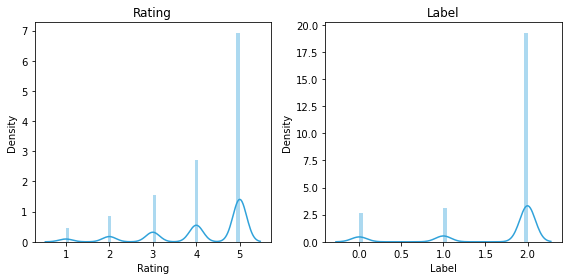

In [ ]:
# Continous Distributions
f, ax = plt.subplots(1,2,figsize=(8,4), sharey=False)
sns.distplot(df.Rating, ax=ax[0])
ax[0].set_title("Rating")
ax[0].set_ylabel("Density")

sns.distplot(df.Label, ax=ax[1])
ax[1].set_title("Label")
ax[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Most common words

One gram

In [ ]:
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

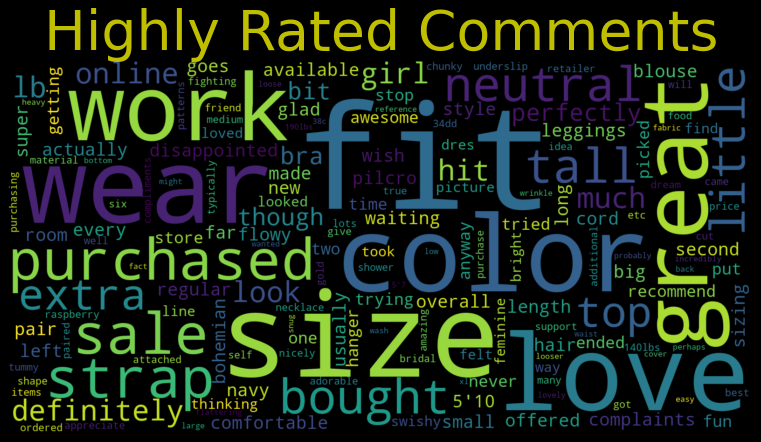

In [ ]:
# Highly Raited
title ="Highly Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) > 3]
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

In [ ]:


# Cloud
#a = cloud(text= temp.values, title=title,stopwords= new_stop)
wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=new_stop,
                         ).generate(str(temp.values))

wordcloud.words_                  


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


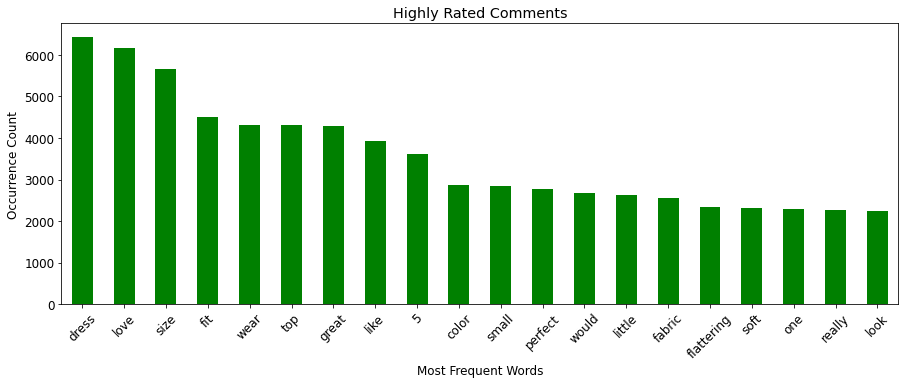

In [ ]:
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

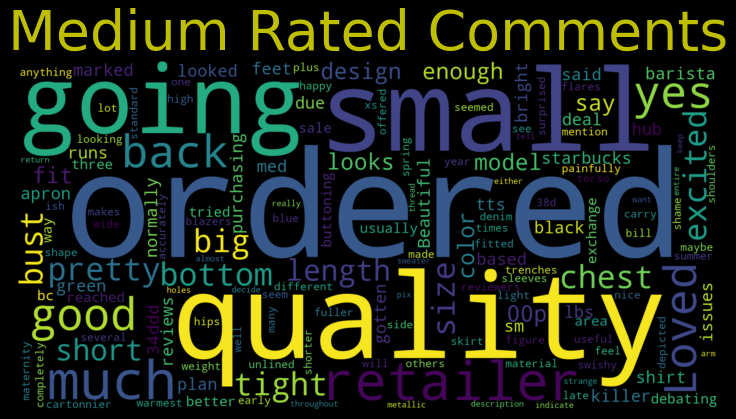

In [ ]:
# Medium Raited
title ="Medium Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) == 3]
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "jacket", "blazer"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

In [ ]:
# Cloud
#a = cloud(text= temp.values, title=title,stopwords= new_stop)
wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=new_stop,
                         ).generate(str(temp.values))

wordcloud.words_     

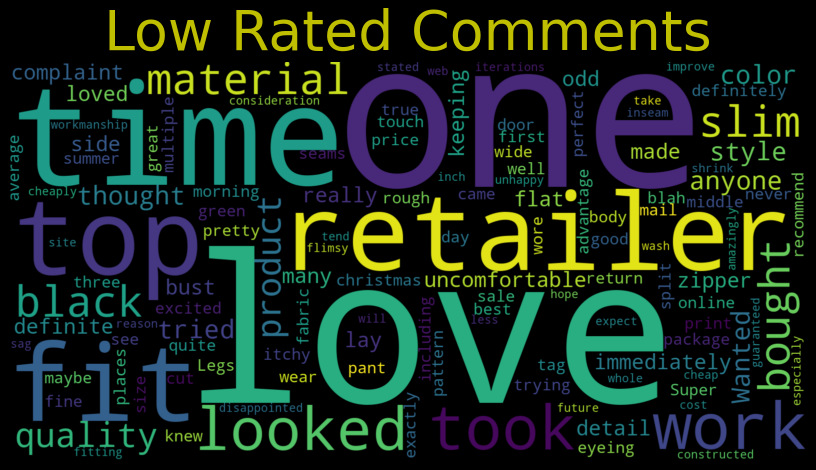

In [ ]:
# Low Raited
title ="Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "jacket", "blazer"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

In [ ]:
# Cloud
#a = cloud(text= temp.values, title=title,stopwords= new_stop)
wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=new_stop,
                         ).generate(str(temp.values))

wordcloud.words_  

N grams

In [ ]:
## Helper Functions
from nltk.util import ngrams
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurrence"]
        out = pd.concat([out, table], axis=1)
    return out

In [ ]:
print("Non-Recommended Items")
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 0], gram=[1,2,3,4,5], length=30)

Non-Recommended Items


,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence,5-Gram,Occurrence
0,dress,1539,wanted love,186,really wanted love,53,really wanted like top,8,wearing medium photos reference measurements,3
1,like,1443,going back,168,wanted love dress,39,really wanted love dress,8,medium photos reference measurements 38,3
2,top,1261,looked like,147,really wanted like,36,really wanted like dress,8,photos reference measurements 38 30,3
3,fit,1093,looks like,128,wanted love top,23,looked like maternity top,7,reference measurements 38 30 40,3
4,would,1072,really wanted,122,made look like,23,5 7 140 lbs,6,reference 5 7 125 lb,3
5,fabric,1006,made look,111,fit true size,23,5 4 120 lbs,6,really wanted love top material,2
6,size,968,look like,99,way much fabric,22,wanted love dress much,5,ordered review back pairs went,2
7,back,820,true size,86,ordered usual size,20,really wanted love top,5,pair jeans wanted pajama jeans,2
8,look,762,5 4,85,like maternity top,19,measurements 38 30 40,5,jeans wanted pajama jeans would,2
9,small,729,felt like,85,sadly going back,18,5 7 125 lb,4,wanted pajama jeans would ordered,2


In [ ]:
print("Recommended Items")
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 1], gram=[1,2,3,4,5], length=30)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


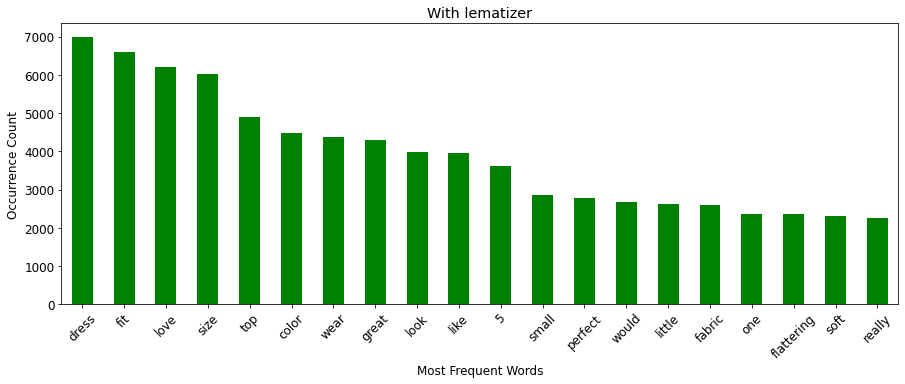

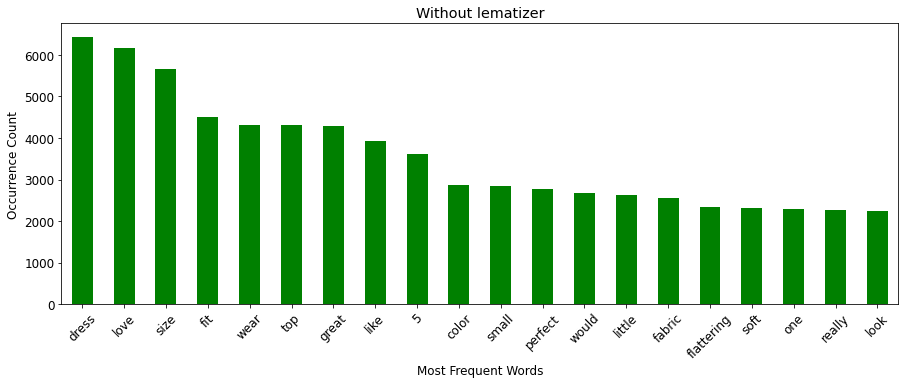

In [ ]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
review_text = df['Review Text'][df.Rating.astype(int) > 3]

def lematize_preprocess(data):
  txt = data.str.lower().str.cat(sep=' ') #1
  words = tokenizer.tokenize(txt) #2
  words = [lemmatizer.lemmatize(w) for w in words if not w in stop_words] #3
  #words = [ps.stem(w) for w in words] #4
  return words



lematized_text_list = []

lematized_text_list.extend(lematize_preprocess(review_text))

title = "With lematizer"

wordfreq(lematized_text_list,20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

title = "Without lematizer"

wordfreq(preprocessing(review_text),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()


Text(0, 0.5, 'Age')

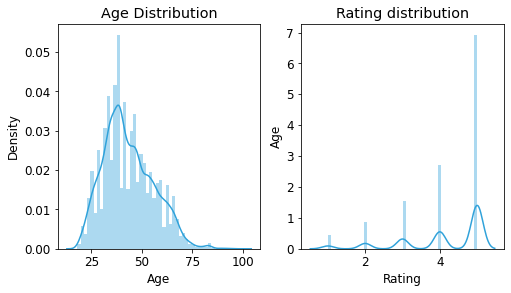

In [ ]:
f, ax = plt.subplots(1,2,figsize=(8,4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")

sns.distplot(df.Rating, ax=ax[1])
ax[1].set_title("Rating distribution")
ax[1].set_ylabel("Age")





Lematization with spacy 


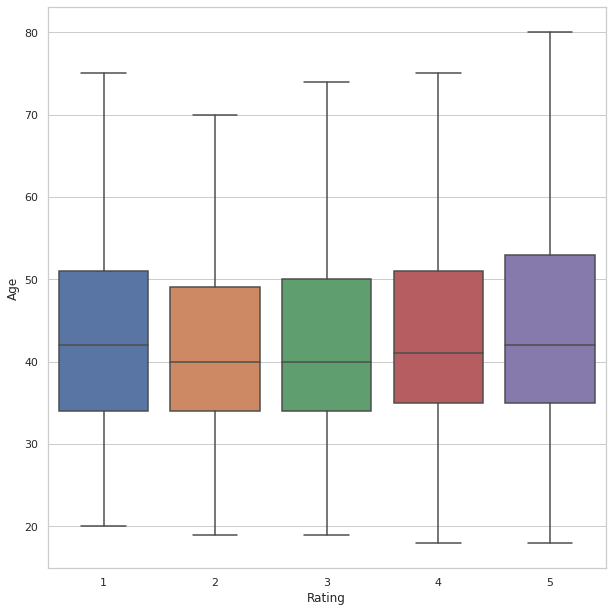

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")


temp = df[['Rating', 'Age']] 
temp = temp[temp.Age.astype(int) < 81]  

rating1 = temp[temp.Rating.astype(int) == 1]
rating1 = rating1[rating1.Age.astype(int) < 77]

rating2 = temp[temp.Rating.astype(int) == 2]
rating2 = rating2[rating2.Age.astype(int) < 72]


rating3 = temp[temp.Rating.astype(int) == 3]
rating3 = rating3[rating3.Age.astype(int) < 75]

rating4 = temp[temp.Rating.astype(int) == 4]
rating4 = rating4[rating4.Age.astype(int) < 76]

rating5 = temp[temp.Rating.astype(int) == 5]


frames = [rating1, rating2, rating3, rating4, rating5]
result = pd.concat(frames)



ax1 = sns.boxplot(x="Rating", y="Age", data=result)
# ax2 = sns.boxplot(x="Rating", y="Age", data=df[['Rating', 'Age']] )

# TODO!!!
# Treba uporedno prikazati za pocetni slucaj df[['Rating', 'Age']]   i za ocisceni result
 



In [ ]:
# !pip install spacytextblob
# !python -m textblob.download_corpora
# !python -m spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

df['Lematized_Review_Text'] = ""

review_text = df['Review Text']


doc_list = []
for ind, x in enumerate(review_text):
  doc = nlp(x)
  
  var = " ".join([token.lemma_ for token in doc])
  df['Lematized_Review_Text'][ind] = var 
  doc_list.append([var])
  
df['Lematized_Review_Text']

0        beautiful dress . good quality . tts . I be 5 ...
1        these pant be so great . I be 5'10 and the tal...
2        I buy a size s in the navy , and m in the neut...
3        love this shirt but it run pretty big . I be n...
4        I love this dress ! I be try on some dress in ...
                               ...                        
18108    just pick this up at my retailer and I just lo...
18109    I be 5'4 , 34b , 106lbs and the 0 fit I perfec...
18110    this dress look great on ... feminine and swis...
18111    I purchase this dress in the raspberry for my ...
18112    I love this dress and will be purchase it in o...
Name: Lematized_Review_Text, Length: 18113, dtype: object

In [ ]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length,Word Count,Character Count,Label,Lematized_Review_Text
0,1094,52,Great dress but not in green,Beautiful dress. good quality. tts. i'm 5 feet...,3,1,1,General,Dresses,Dresses,6,56,56,296,1,beautiful dress . good quality . tts . I be 5 ...
1,1066,72,"Love! but more tall options, please!",These pants are so great. i am 5'10 and the ta...,5,1,11,General Petite,Bottoms,Pants,6,82,82,419,2,these pant be so great . I be 5'10 and the tal...
2,854,39,Love it!,"I bought a size s in the navy, and m in the ne...",5,1,0,General,Tops,Knits,2,69,69,325,2,"I buy a size s in the navy , and m in the neut..."
3,864,34,Runs big but cute buy on sale,Loved this shirt but it runs pretty big. i'm n...,3,1,1,General Petite,Tops,Knits,7,51,51,275,1,love this shirt but it run pretty big . I be n...
4,1110,43,Looks better than the picture!,I love this dress! i was trying on some dresse...,5,1,0,General Petite,Dresses,Dresses,5,105,105,500,2,I love this dress ! I be try on some dress in ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18108,865,37,Great style!,Just picked this up at my retailer and i just ...,5,1,2,General,Tops,Knits,2,102,102,501,2,just pick this up at my retailer and I just lo...
18109,1094,33,Beautifully made dress,"I am 5'4, 34b, 106lbs and the 0 fit me perfect...",5,1,0,General,Dresses,Dresses,3,45,45,211,2,"I be 5'4 , 34b , 106lbs and the 0 fit I perfec..."
18110,1074,71,Love this!,This dress looks great on...feminine and swish...,5,1,9,General,Dresses,Dresses,2,63,63,324,2,this dress look great on ... feminine and swis...
18111,1094,30,Great!!!!,I purchased this dress in the raspberry for my...,5,1,0,General,Dresses,Dresses,1,94,94,499,2,I purchase this dress in the raspberry for my ...


# Embeddings Visualization

In [1]:
!pip install -q umap-learn
!pip install pyyaml==5.4.1

You should consider upgrading via the 'C:\Users\Marko\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Marko\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from umap import UMAP
import plotly.express as px
import plotly.graph_objects as go

from os.path import exists
import os 
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
def read_pickle(path):
  with open(path, "rb") as f:
    return pickle.load(f)

def write_pickle(path, object):
  with open(path, "wb") as f:
    return pickle.dump(object, f)

def get_indices(condition, array):
    return [i for i, elem in enumerate(array) if condition(elem)]

def filter_by_indices(indices, to_filter):
    return [l for i, l in enumerate(to_filter) if i in indices]

In [11]:
pickle_folder = '..\\..\\data\\pickle'
X_validation = read_pickle(os.path.join(pickle_folder, 'embeddings_validation.pkl'))
y_validation = read_pickle(os.path.join(pickle_folder, 'ratings_validation.pkl'))

In [13]:
umap_2d = UMAP(n_components=2, init='spectral', metric='cosine', n_epochs=300, n_neighbors=10)
umap_3d = UMAP(n_components=3, init='spectral', metric='cosine', n_epochs=300, n_neighbors=15)

proj_2d = umap_2d.fit_transform(X_validation)
proj_3d = umap_3d.fit_transform(X_validation)

In [14]:
unique_labels = list(sorted(set(y_validation)))
colors = ["red", "green", "blue", "goldenrod", "magenta"]

fig_2d = go.Figure(layout={"title": "2D Review embeddings", 
                            "legend":{"title":"Ratings"},
                            "height":700})

fig_3d = go.Figure(layout={"title": "3D Review embeddings", 
                            "legend":{"title":"Ratings"},
                            "height":700})

for label in unique_labels:
  indices = get_indices(lambda x: x == label, y_validation)
  proj_2d_filtered = filter_by_indices(indices, proj_2d)
  proj_2d_filtered = np.array(proj_2d_filtered)

  fig_2d.add_trace(go.Scatter(
    x = proj_2d_filtered[:,0], 
    y = proj_2d_filtered[:,1], 
    mode="markers", 
    name=f"Rating {label}",
    marker_sizemin=4,
    marker_color=colors[label-1]
  ))

  proj_3d_filtered = filter_by_indices(indices, proj_3d)
  proj_3d_filtered = np.array(proj_3d_filtered)

  fig_3d.add_trace(go.Scatter3d(
    x = proj_3d_filtered[:,0], 
    y = proj_3d_filtered[:,1], 
    z = proj_3d_filtered[:,2],
    mode="markers", 
    name=f"Rating {label}",
    marker_sizemin=4,
    marker_color=colors[label-1]
  ))


fig_2d.show()
fig_3d.show()

Not linearly separable in 2d/3d space 😞